# Assignment 2 - House Prices: Advanced Regression Techniques

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from numpy import array
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set()

## Import Data
'train_clean.csv' and 'test_clean.csv' is the cleaned up trained data set that worked on in Assignment 1.

In [2]:
# Create file path
train_clean_file = os.path.join(os.getcwd(), 'data', 'train_clean.csv')
test_clean_file = os.path.join(os.getcwd(), 'data', 'test_clean.csv')

# Load csv into pandas df
df_train_clean = pd.read_csv(train_clean_file)
df_test_clean = pd.read_csv(test_clean_file)

df_train_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqft,TotalBath,HouseAge,ReModeled
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,2566,3.5,5,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,2524,2.5,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,2706,3.5,7,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,2473,2.0,91,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,3343,3.5,8,0


## Check corrlation

In [3]:
corr_mat = df_train_clean.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
TotalSqft       0.832877
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
TotalBath       0.635896
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
Name: SalePrice, dtype: float64

## 1. Conduct your analysis using a cross-validation design.

In [36]:
x = df_train_clean[['TotalSqft', 'OverallQual', 'TotalBsmtSF', 'GarageCars']]
y = df_train_clean['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1093, 4) (365, 4) (1093,) (365,)


In [37]:
# Standardizing the scales
ss = StandardScaler()
xs = ss.fit_transform(x_train)

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(xs, y_train)

print('labels\n', x.columns)
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)
print('R2 for Train:', lin_reg.score(xs, y_train ))
print('R2 for Test (cross validation)', lin_reg.score(x_test, y_test))

labels
 Index(['TotalSqft', 'OverallQual', 'TotalBsmtSF', 'GarageCars'], dtype='object')
Coefficients: 
 [40588.50492782 27793.92238832 -3291.0510298  11020.97113989]
Intercept: 
 178976.04025617565
R2 for Train: 0.8045860973811353
R2 for Test (cross validation) -1473830.5152127286


In [43]:
pd.DataFrame( list(zip(x.columns, lin_reg.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,TotalSqft,40588.504928
1,OverallQual,27793.922388
2,TotalBsmtSF,-3291.051030
3,GarageCars,11020.971140


In [44]:
score = cross_val_score(lin_reg, xs, y_train, cv=5)

print(f'CV Score: {score}')
print('R2_avg: %0.2f (+/- %0.2f)'%(score.mean(), score.std() * 2))

CV Score: [0.79097695 0.82811912 0.78729236 0.80999369 0.79189987]
R2_avg: 0.80 (+/- 0.03)


## 2. Conduct EDA and provide appropriate visualizations in the process.

## 3. Build a minimum of two separate regression models using the training set.

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(f"Model Score: {lin_reg.score(x_train, y_train)}")

Model Score: 0.8045860973811353


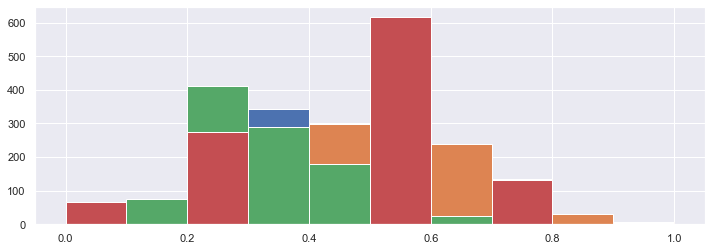

In [47]:
### MinMaxScaler
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax_train = scaler.fit_transform(x_train)

### Scale test set
x_minmax_test = scaler.fit_transform(x_test)

ax.hist(x_minmax_train [:,0]);
ax.hist(x_minmax_train [:,1]);
ax.hist(x_minmax_train [:,2]);
ax.hist(x_minmax_train [:,3]);

### Linear Regression

In [48]:
reg = LinearRegression()
reg.fit(x_minmax_train, y_train)
print(f'Linear Regression coefficients: {reg.coef_}')
print(f'Linear Regression intercept: {reg.intercept_}')
print(f"Model Score: {reg.score(x_minmax_train, y_train)}")

# model evaluation for training set
y_train_predict = reg.predict(x_minmax_train)

# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(y_train, y_train_predict, 1)

Linear Regression coefficients: [323762.01680274 179994.54752283 -25555.15106736  58732.47329721]
Linear Regression intercept: -56720.78988255447
Model Score: 0.8045860973811354


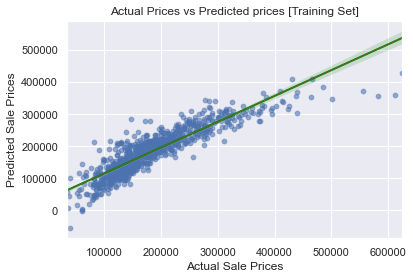

In [49]:
sns.scatterplot(x=y_train, y=y_train_predict, alpha=0.4)
sns.regplot(x=y_train, y=y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y_train), y=np.unique(np.poly1d(b + m * np.unique(y_train))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Training Set]")
 
plt.show()

### Lasso regression

SalePrice       1.000000
TotalSqft       0.832877
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
TotalBath       0.635896
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769

In [55]:
x2 = df_train_clean[['TotalSqft', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 
                    'TotalBath', '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd']]
y2 = df_train_clean['SalePrice']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2)

print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

(1093, 9) (365, 9) (1093,) (365,)


In [56]:
scaler = MinMaxScaler()
x_minmax_train2 = scaler.fit_transform(x_train2)

### Scale test set
x_minmax_test2 = scaler.fit_transform(x_test2)

In [58]:
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(x_minmax_train2, y_train2)
print(f'Linear Regression coefficients: {lasso_reg.coef_}')
print(f'Linear Regression intercept: {lasso_reg.intercept_}')
print(f"Model Score: {lasso_reg.score(x_minmax_train2, y_train2)}")

# model evaluation for training set
y_train_predict2 = lasso_reg.predict(x_minmax_train2)

# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(y_train2, y_train_predict2, 1)

Linear Regression coefficients: [340057.18785923 167620.01835339 -76192.98436994  15508.53897056
  52286.53839875  35448.57138641  49018.64890029 -25932.54180465
 -20847.63093796]
Linear Regression intercept: -11437.610248767189
Model Score: 0.8149815098257224


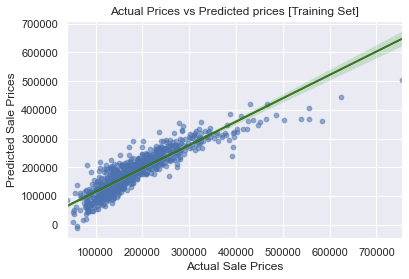

In [59]:
sns.scatterplot(x=y_train2, y=y_train_predict2, alpha=0.4)
sns.regplot(x=y_train2, y=y_train_predict2, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y_train2), y=np.unique(np.poly1d(b + m * np.unique(y_train2))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Training Set]")
 
plt.show()

## 4. Evaluate polynomial, indicator, dichotomous, & piecewise model components

### Polynomial Regression

In [61]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2, include_bias=False)
   
# transform the features to higher degree features.
x_train_poly = poly_features.fit_transform(x_minmax_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(x_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(x_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))

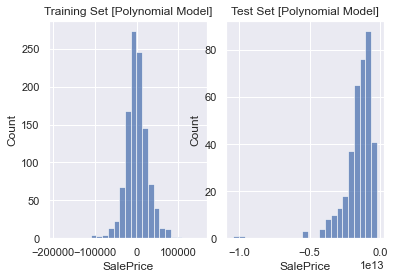

In [62]:
y_train_residual = y_train_predicted - y_train
y_test_residual = y_test_predicted - y_test


fig, axes = plt.subplots(2, 1)
# Adjust the subplot layout parameters
fig.subplots_adjust(hspace=0.125, wspace=0.125)

plt.subplot(1, 2, 1)
sns.histplot(y_train_residual, bins=25)
plt.title('Training Set [Polynomial Model]')

plt.subplot(1, 2, 2)
sns.histplot(y_test_residual, bins=25)
plt.title('Test Set [Polynomial Model]')

plt.show()

In [69]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(labels=["train","val"])

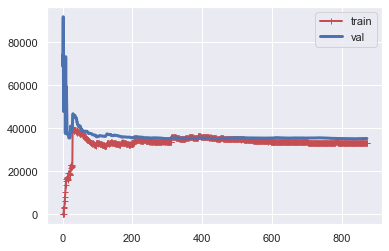

In [70]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_minmax_train, y_train)

### Indicator